In [11]:
from qacits import run_qacits
import heeps
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np

# Calibration drift

calib drift = 120 points in each direction


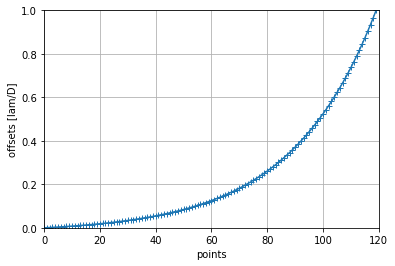

In [10]:
logb = .02
npts = 120
xy = np.logspace(np.log10(logb), np.log10(1 + logb), npts) - logb
print('calib drift = %s points in each direction'%len(xy))
plt.plot(xy,'-+')
plt.xlim(0, len(xy))
plt.ylim(0, 1)
plt.xlabel('points')
plt.ylabel('offsets [lam/D]')
plt.grid(True), plt.grid(which='minor', linestyle=':');

# L-band CVC

### create calibration PSFs with HEEPS

In [ ]:
conf = dict(
    dir_output='calib',
    f_pupil='pupil/ELT_fullM1.fits',
    f_phase='wavefront/cube_Cfull_20211007_24s_100ms_0piston_meters_scao_only_L_285.fits'
    band='L',
    mode='CVC',
    ls_dRext = 0.0209,
    ls_dRint = 0.09,
    ls_dRspi = 0.0245,

    nframes=2*len(xy),
    add_phase=True,
    add_point_err=True,
    )
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=False, **conf)


In [2]:
# load HEEPS data (on-axis PSF cube, and off-axis PSF frame)
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/output_files/scao_only')))
f_psf_ON = 'onaxis_PSF_L_RAVC.fits'
f_psf_OFF = 'offaxis_PSF_L_RAVC.fits'
nframes = 10
psf_ON = fits.getdata(f_psf_ON) [:nframes]
psf_OFF = fits.getdata(f_psf_OFF) 

In [6]:
# calculate FWHM from HEEPS data
hdr = fits.open(f_psf_OFF)[0].header
conf = dict(
    lam = float(hdr['LAM']),
    diam_ext = float(hdr['DIAM_EXT']),
    diam_nominal = float(hdr['DIAM_NOM']),
    ls_dRext = float(hdr['LS_DREXT']),
    pscale = float(hdr['PSCALE']),
)
print('lam=%.4e, diam_ext=%s, diam_nominal=%s, ls_dRext=%s, pscale=%s'%(*conf.values(),))
from heeps.util.psf_flux import get_fwhm
fwhm = get_fwhm(**conf)
print('fwhm = %.4f pix'%fwhm)

lam=3.8112e-06, diam_ext=36.905, diam_nominal=38.542, ls_dRext=0.0291, pscale=5.47
fwhm = 3.9811 pix


In [ ]:
run_qacits(psf_ON, psf_OFF, fwhm)

In [ ]:
filename = 'onaxis_PSF_L_RAVC_small.fits'
with fits.open(filename, 'update') as hdul:
    hdul[0].data = hdul[0].data[:240]

    # append all scalar parameters from the sorted conf dict
    conf.update(dir_output=dir_output, band=band, mode=mode, pscale=pscale, dit=dit)
    conf = {k: v for k, v in sorted(conf.items())}
    for key, value in conf.items():
        if type(value) not in (dict, list, np.ndarray):
            hdul[0].header.append((key[:8], str(value)[-50:], key))  

SyntaxError: can't use starred expression here (2927542552.py, line 4)